In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import hashlib

In [385]:

def value_as_color(x, y):
    hash_data = hashlib.sha256(f'{int(x)},{int(y)}'.encode()).digest()
    return np.frombuffer(hash_data, dtype=np.uint8)[:12:4]

In [439]:
x_values = np.linspace(0,7,1000)
y_values = np.linspace(0,14,1000)


In [440]:
img = np.zeros((len(x_values), len(y_values), 3), dtype=np.uint8)
for j, y in enumerate(y_values):
    for i, x in enumerate(x_values):
        img[j, i, :] = value_as_color(*world_to_axial(x,y))

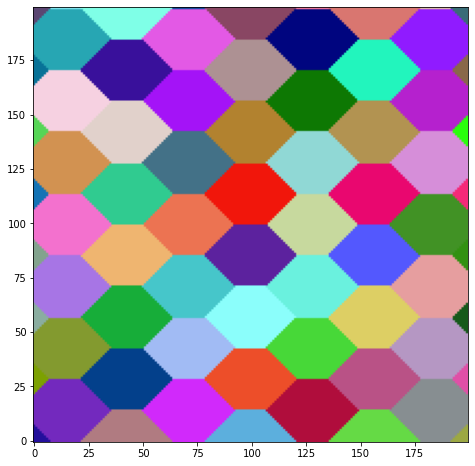

In [428]:

fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
ax.imshow(img,origin='lower')

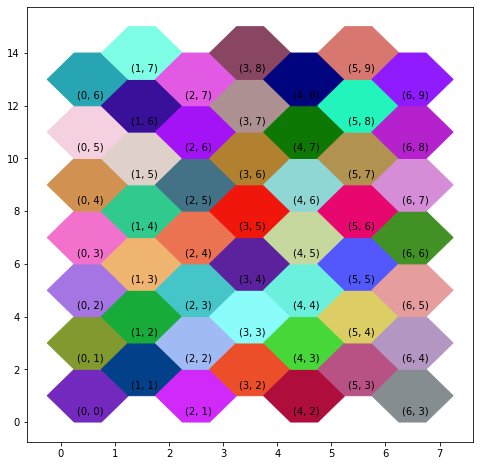

In [426]:
def plot_hex(ax, origin, color='k'):
    points = np.array([
        [w/2+p,0],
        [w/2, 1],
        [-w/2, 1],
        [-w/2-p, 0],
        [-w/2, -1],
        [w/2, -1],
        [w/2+p,0]
    ])+origin+np.array([0.5,1])
    ax.fill(*points.transpose(), color=color)
    
def axial_to_world(i, j):
    x = np.float(i)
    y = np.float(2*j + i%2 - 2*((i+1)//2))
    return x,y

def world_to_axial(x, y):
    world = np.array([x,(y-np.floor(x))/2])
    bottom_left = np.floor(world)
    local = world-bottom_left
    
    if np.sum([local[0], local[1]]) < 0.25:
        move = (-1, -1)
    elif np.sum([local[0], 1-local[1]]) < 0.25:
        move = (-1, 0)
    elif np.sum([1-local[0], 1-local[1]]) < 0.25:
        move = (1, 1)
    elif np.sum([1-local[0], local[1]]) < 0.25:
        move = (1, 0)
    else:
        move = (0, 0)
        
    i = np.int(np.floor(x))
    j = np.int(np.floor((y-i%2)/2)) + (i+1)//2
    return (i + move[0],j + move[1])
    
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()
for i in np.arange(0, 7):
    for j in np.arange(0, 7):
        j = j + (i+1)//2;
        x, y = axial_to_world(i, j)
        col = value_as_color(i, j).astype(float)/256
        plot_hex(ax, [x,y], color=col)
        ax.annotate(f'({i}, {j})', [x,y], np.array([x,y])+0.3)

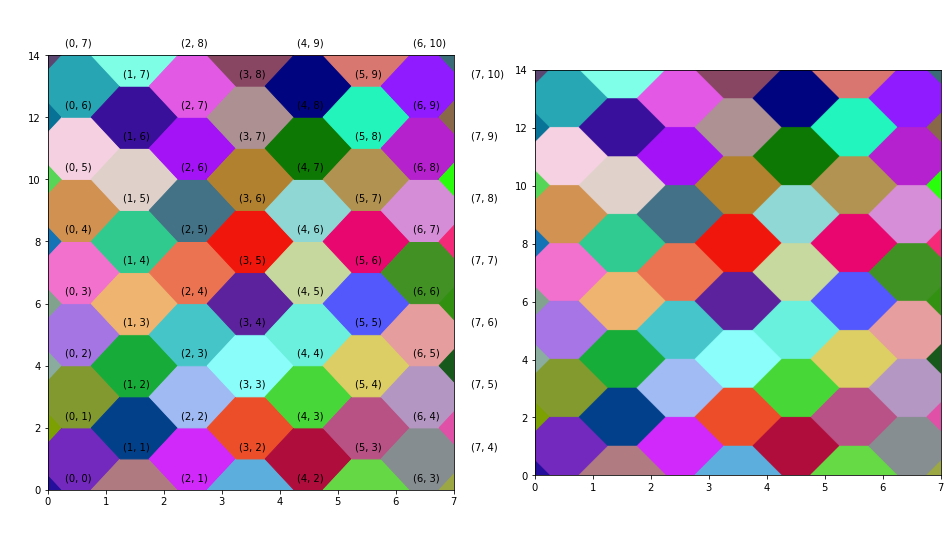

In [443]:
fig = plt.figure(figsize=(16,8))

ax = plt.subplot(1, 2, 1)
for i in np.arange(-1, 8):
    for j in np.arange(-1, 8):
        j = j + (i+1)//2;
        x, y = axial_to_world(i, j)
        col = value_as_color(i, j).astype(float)/256
        plot_hex(ax, [x,y], color=col)
        ax.annotate(f'({i}, {j})', [x,y], np.array([x,y])+0.3)
        
ax.set_xlim([0, 7])
ax.set_ylim([0, 14])

ax = plt.subplot(1, 2, 2)
ax.imshow(img,origin='lower', extent=(0,7,0,14), aspect=0.5)


In [372]:
h=np.cos(np.deg2rad(30))
p=np.sin(np.deg2rad(30))
w = (1-p)

In [402]:
np.sum([23, 2])

25

In [374]:
world_to_axial(0.0,2.0)

(0, 1)

In [375]:
axial_to_world(1,1)

(1.0, 1.0)

In [376]:
world_to_axial(1, 1)

(1, 0)

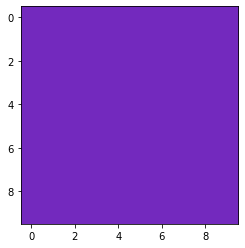

In [338]:
plt.imshow([[value_as_color(0,0)]*10]*10)

In [38]:
np.frombuffer(hash.digest(), dtype=np.uint8)

array([ 23, 248, 175, 151, 173,  74, 127, 118,  57, 164, 201,  23,  29,
        81, 133, 203, 175, 184,  84,  98, 135, 122,  71,  70, 194,  27,
       219,  10,  79, 148,  12, 160], dtype=uint8)